1. Realizar un análisis exhaustivo de calidad de datos para identificar y tratar posibles
valores faltantes, valores atípicos y errores en los datos. Garantizar que el conjunto
de datos esté limpio y preparado para su posterior procesamiento y entrenamiento
de los modelos.


   Review #           Brand   
0      2580       New Touch  \
1      2579        Just Way   
2      2578          Nissin   
3      2577         Wei Lih   
4      2576  Ching's Secret   

                                             Variety Style Country Stars   
0                           T's Restaurant Tantanmen   Cup   Japan  3.75  \
1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack  Taiwan     1   
2                      Cup Noodles Chicken Vegetable   Cup     USA  2.25   
3                      GGE Ramen Snack Tomato Flavor  Pack  Taiwan  2.75   
4                                    Singapore Curry  Pack   India  3.75   

  Top Ten  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-nu

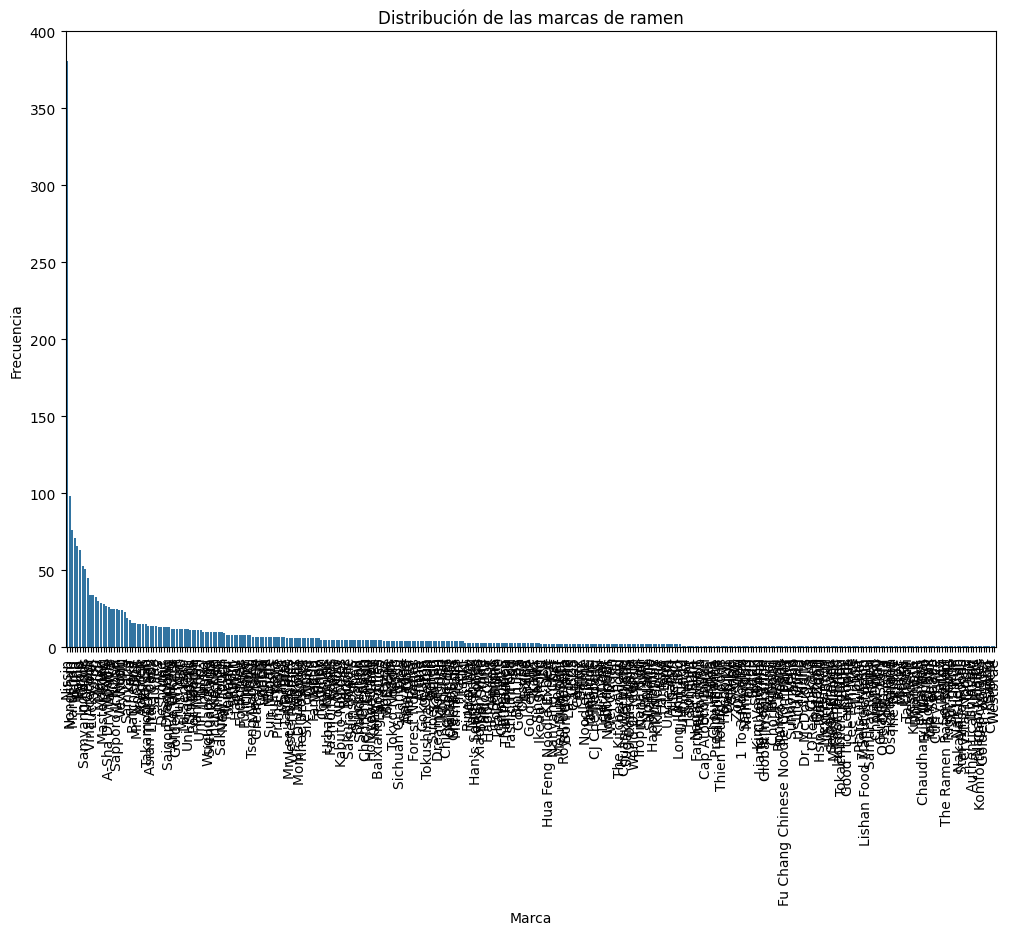

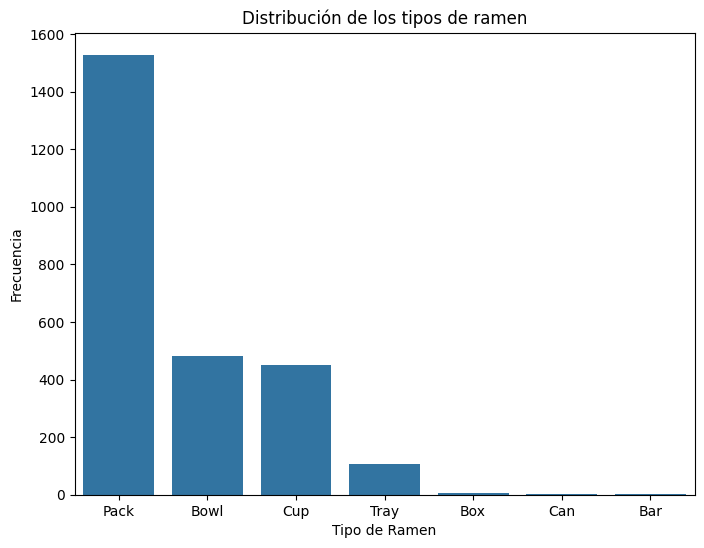

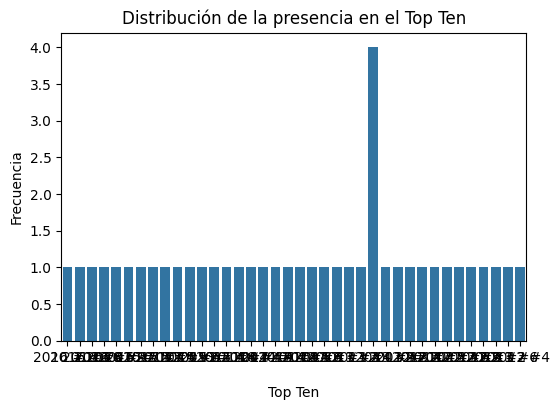

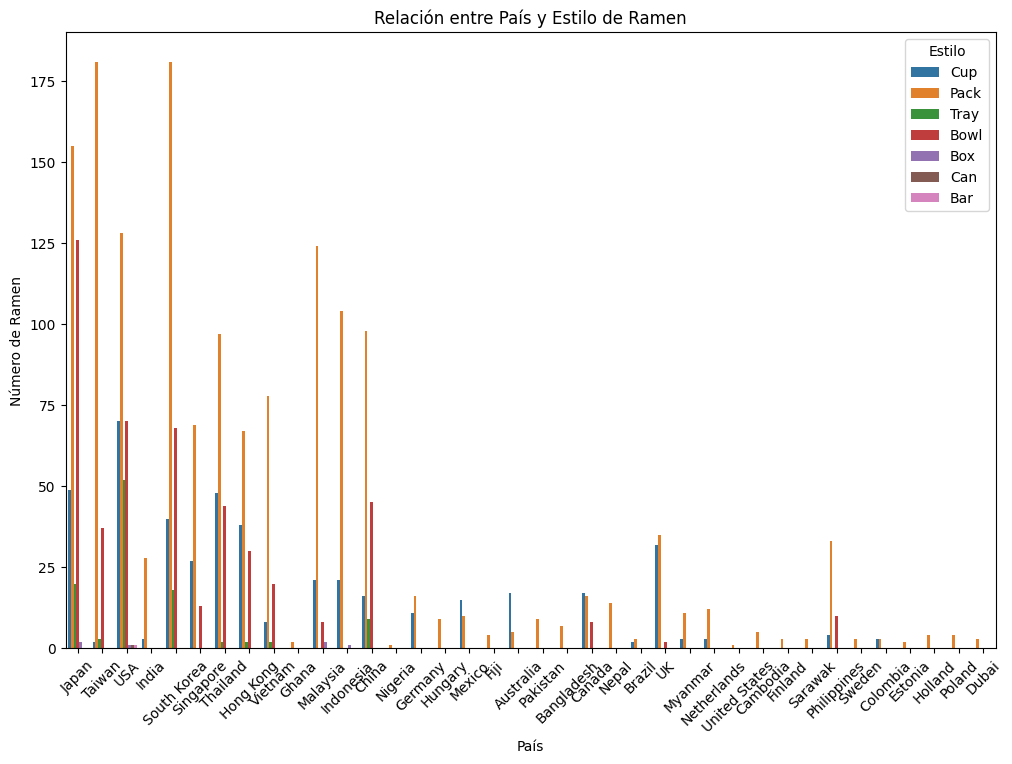

'La distribucion de las marcas de ramen la frecuencia de 5 la tienen indomie y prima taste, a 4 llega nongshim, \nen 3 mama,mykuali y paldo, en 2 myojo, mamee y sapporo ichiban, el resto esta en frecuencia 1.    \nEn la distribucion de tipos de ramen tenemos frecuencia de 35 en pack, 5 en tray, 1 en bowl y cup.   \nEn la distribucion de la presencia de top ten tenemos solo uno con frecuencia 4 y los demás en frecuencia 1 no se alcanza a notar \nque datos son los que tienen esas frecuencias ya que se empalman. por ultimo la relacion país y estilo de ramen  notamos l\na mayoría de países( myanmar, singapore, taiwan, china, malaysia, thailand, usa, indonesia, hongkong) \ncon numeros de ramen solo de Pack y son de 1,7,2,1,6,3,1,6,1 en orden de los paises como los mencione, japon tiene 4 en tray y 2 en Pack, \nen south korea tenemos 1 en cup, 1 en bowl y 5 en Pack'

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

data = pd.read_excel("ramen-ratings.xlsx")

#FernandoSanchez Exploración inicial de los datos
print(data.head())
print(data.info())

#FernandoSanchez Tratamiento de valores faltantes y atipicos
missing_values = data.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)
data.dropna(subset=['Stars'], inplace=True)
data = data[data['Stars'] != 'Unrated']

#FernandoSanchez Visualización de la distribución de las marcas de ramen
plt.figure(figsize=(12, 8))
sns.countplot(x='Brand', data=data, order=data['Brand'].value_counts().index)
plt.title("Distribución de las marcas de ramen")
plt.xlabel("Marca")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

#FernandoSanchez Visualización de la distribución de los tipos de ramen
plt.figure(figsize=(8, 6))
sns.countplot(x='Style', data=data, order=data['Style'].value_counts().index)
plt.title("Distribución de los tipos de ramen")
plt.xlabel("Tipo de Ramen")
plt.ylabel("Frecuencia")
plt.show()

#FernandoSanchez Visualización de la distribución de la presencia en el Top Ten
plt.figure(figsize=(6, 4))
sns.countplot(x='Top Ten', data=data)
plt.title("Distribución de la presencia en el Top Ten")
plt.xlabel("Top Ten")
plt.ylabel("Frecuencia")
plt.show()

#FernandoSanchez Visualización de la relación entre variables categóricas
plt.figure(figsize=(12, 8))
sns.countplot(x='Country', hue='Style', data=data)
plt.title("Relación entre País y Estilo de Ramen")
plt.xlabel("País")
plt.ylabel("Número de Ramen")
plt.xticks(rotation=45)
plt.legend(title='Estilo')
plt.show()

"""La distribucion de las marcas de ramen la frecuencia de 5 la tienen indomie y prima taste, a 4 llega nongshim, 
en 3 mama,mykuali y paldo, en 2 myojo, mamee y sapporo ichiban, el resto esta en frecuencia 1.    
En la distribucion de tipos de ramen tenemos frecuencia de 35 en pack, 5 en tray, 1 en bowl y cup.   
En la distribucion de la presencia de top ten tenemos solo uno con frecuencia 4 y los demás en frecuencia 1 no se alcanza a notar 
que datos son los que tienen esas frecuencias ya que se empalman. por ultimo la relacion país y estilo de ramen  notamos l
a mayoría de países( myanmar, singapore, taiwan, china, malaysia, thailand, usa, indonesia, hongkong) 
con numeros de ramen solo de Pack y son de 1,7,2,1,6,3,1,6,1 en orden de los paises como los mencione, japon tiene 4 en tray y 2 en Pack, 
en south korea tenemos 1 en cup, 1 en bowl y 5 en Pack"""


2. Realizar el preprocesamiento de los datos, incluyendo la normalización o
estandarización de las características, codificación de variables categóricas y
división del conjunto de datos en conjuntos de entrenamiento y prueba.

In [10]:
#FernandoSanchez Dividir los datos en características (X) y etiquetas (y)
X = data.drop(columns=['Stars'])
y = data['Stars']

#FernandoSanchez Convertir la variable objetivo en categórica
y = pd.cut(y.astype(float), bins=[-np.inf, 2.5, 3.5, 4.5, np.inf], labels=[1, 2, 3, 4])

#FernandoSanchez Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#FernandoSanchez Definir las transformaciones para las características numéricas y categóricas
numeric_features = ['Review #']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Brand', 'Variety', 'Style', 'Country', 'Top Ten']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



3. Dividir los datos en conjuntos de entrenamiento y prueba y entrenar dos modelos de
clasificación: uno utilizando Regresión Logística y otro utilizando Support Vector
Machine (SVM). Estos modelos servirán para determinar si un paquete de ramen es
"bueno" o "malo" en función de las características proporcionadas y realiza una
búsqueda de hiperparámetros.

In [13]:
# FernandoSanchez Construir el pipeline de preprocesamiento y modelo de clasificación para SVM
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42, probability=True))  # Habilitar la predicción de probabilidades
])

# FernandoSanchez Definir los parámetros para la búsqueda de hiperparámetros para SVM
param_dist_svm = {
    'classifier__C': [0.1, 1, 10],  # Regularización
    'classifier__kernel': ['linear', 'rbf', 'poly'],  # Tipo de kernel
    'classifier__gamma': ['scale', 'auto'],  # Coeficiente del kernel (para 'rbf' y 'poly')
}

# FernandoSanchez Realizar la búsqueda de hiperparámetros utilizando RandomizedSearchCV para SVM
random_search_svm = RandomizedSearchCV(pipeline_svm, param_dist_svm, n_iter=10, cv=StratifiedKFold(n_splits=5), random_state=42)
random_search_svm.fit(X_train, y_train)

# FernandoSanchez Imprimir los mejores parámetros encontrados para SVM
print("Best parameters found for SVM:")
print(random_search_svm.best_params_)

# FernandoSanchez Realizar predicciones en el conjunto de prueba para SVM
y_pred_svm = random_search_svm.predict(X_test)

# FernandoSanchez Imprimir el reporte de clasificación para SVM
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

#FernandoSanchez Construir el pipeline de preprocesamiento y modelo de clasificación
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

#FernandoSanchez Definir los parámetros para la búsqueda de hiperparámetros
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
}

#FernandoSanchez Realizar la búsqueda de hiperparámetros
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

#FernandoSanchez Imprimir los mejores parámetros encontrados
print("Best parameters found for Logistic Regression:")
print(grid_search_lr.best_params_)

#FernandoSanchez Realizar predicciones en el conjunto de prueba
y_pred_lr = grid_search_lr.predict(X_test)

#FernandoSanchez Imprimir el reporte de clasificación
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

"""Obtuve muchos warnings, trate de muchos metodos mejorar los modelos pero los datos estan o con muy pocos registros o con solo una clase, 
cuando intente decodificar me dividia las brands y generaba otros errores, modifique muchas veces los hiperparametros y tambien trate de modificar los conjuntos de datos
Pero siguen los errores asi que deje la que minimo aplico los modelos"""

Best parameters found for SVM:
{'classifier__kernel': 'poly', 'classifier__gamma': 'scale', 'classifier__C': 1}

Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.33      0.12      0.17        59
           2       0.48      0.43      0.45       155
           3       0.46      0.73      0.57       207
           4       0.60      0.19      0.29        95

    accuracy                           0.47       516
   macro avg       0.47      0.37      0.37       516
weighted avg       0.48      0.47      0.44       516



C:\Users\Fernando Sanchez\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Fernando Sanchez\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best parameters found for Logistic Regression:
{'classifier__C': 10, 'classifier__penalty': 'l2'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       0.33      0.12      0.17        59
           2       0.47      0.41      0.44       155
           3       0.48      0.70      0.57       207
           4       0.55      0.33      0.41        95

    accuracy                           0.48       516
   macro avg       0.46      0.39      0.40       516
weighted avg       0.47      0.48      0.46       516



C:\Users\Fernando Sanchez\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'Obtuve muchos warnings, trate de muchos metodos mejorar los modelos pero los datos estan o con muy pocos registros o con solo una clase, \ncuando intente decodificar me dividia las brands y generaba otros errores, modifique muchas veces los hiperparametros y tambien trate de modificar los conjuntos de datos\nPero siguen los errores asi que deje la que minimo aplico los modelos'

4. Evaluar el rendimiento de ambos modelos utilizando métricas relevantes para
problemas de clasificación, como precisión, recall, F1-score y el área bajo la curva
ROC (AUC-ROC). A partir de esto, debes comparar y analizar los resultados obtenidos por cada modelo para determinar cuál es más adecuado para este problema
específico.


In [16]:

#FernandoSanchez Evaluar el rendimiento de SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
roc_auc_svm = roc_auc_score(y_test, random_search_svm.predict_proba(X_test), average='weighted', multi_class='ovr')

#FernandoSanchez Evaluar el rendimiento de Regresión Logística
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
roc_auc_lr = roc_auc_score(y_test, grid_search_lr.predict_proba(X_test), average='weighted', multi_class='ovr')

#FernandoSanchez Imprimir los resultados
print("Resultados de SVM:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precisión: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")
print(f"AUC-ROC: {roc_auc_svm:.4f}")

print("\nResultados de Regresión Logística:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precisión: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")
print(f"AUC-ROC: {roc_auc_lr:.4f}")

"""En resumen, aunque la Regresión Logística tiene una precisión ligeramente mejor, la SVM muestra un mejor rendimiento en términos de F1-score y AUC-ROC. 
Por lo tanto, en este caso particular, la SVM podría considerarse el modelo más adecuado para este problema de clasificación específico."""

Resultados de SVM:
Accuracy: 0.4709
Precisión: 0.4787
Recall: 0.4709
F1-score: 0.4372
AUC-ROC: 0.6792

Resultados de Regresión Logística:
Accuracy: 0.4787
Precisión: 0.4738
Recall: 0.4787
F1-score: 0.4559
AUC-ROC: 0.6540


'En resumen, aunque la Regresión Logística tiene una precisión ligeramente mejor, la SVM muestra un mejor rendimiento en términos de F1-score y AUC-ROC. \nPor lo tanto, en este caso particular, la SVM podría considerarse el modelo más adecuado para este problema de clasificación específico.'